## Lab Week 10, Wavelet
### Amir 2022

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 4 line (f1,f2) and edge (f3,f4) detector filters
# to detect vertical (f1,f3) and horizontal (f2,f4) patterns
# T is the transpose operator in np
#
f1 = np.array([[1 , -1 , 1] , [1, -3, 1] , [1, -1 , 1]])
f2 = f1.T
f3 =  np.array([[2 , 0 , -1] , [2, 0, -3] , [2, 0, -1]])
f4 = f3.T

In [3]:
# function to compute the image power. input could be graylevel or color. 
#
def am_power(a):
    a = a.astype(np.float32)
    dim1 = a.shape
    
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]        
    pa = np.sum(np.multiply(a,a)) / sz    
    
    return pa

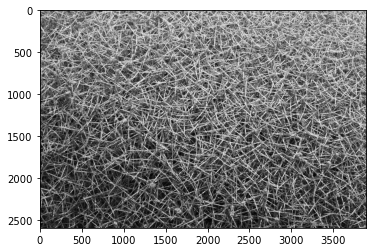

In [4]:
# input image, you may try different images. e.g.:
# diag_texture.bmp
# IMG_8561.JPG
# IMG_0054.JPG
# hor_texture.jpg 
# IMG_20200111_141756.jpg 
#
img = cv2.imread('IMG_0054.JPG',0)
plt.imshow(img, cmap='gray')

In [5]:
print('original image size and power= ', img.shape,'\t', am_power(img))

original image size and power=  (2592, 3888) 	 15875.922979220648


In [6]:
# lists of lowpass/ Gaussian, highpass/ Laplacian pyramids, plus applying f1 to 
# f4 filters on Gaussian levels.
# number of levels = levels
#
imgl=[]
imgh=[]
fl1=[]
fl2=[]
fl3=[]
fl4=[] 

levels=6
for i in range(levels): 
    M=img.shape
    # printing the pyramid level size
    print(M)
    # lowpass filtering by downsampling by 2
    ltmp = cv2.resize(img, (int(M[1]/2) , int(M[0]/2)))
    imgl.append( ltmp )
    # highpass filtering by image - lowpass filtered 
    imgh.append( img - cv2.resize(ltmp, (M[1], M[0])) )
    # filtering the lowpass filtered image by f1 to f4 
    fl1.append( cv2.filter2D(ltmp, cv2.CV_8UC3, f1) )
    fl2.append( cv2.filter2D(ltmp, cv2.CV_8UC3, f2) )
    fl3.append( cv2.filter2D(ltmp, cv2.CV_8UC3, f3) )
    fl4.append( cv2.filter2D(ltmp, cv2.CV_8UC3, f4) )
    img = ltmp
  

(2592, 3888)
(1296, 1944)
(648, 972)
(324, 486)
(162, 243)
(81, 121)


In [7]:
# printing the power of different Gaussian and Laplacian levels, plus filtered images powers
#
for i in range(levels): 
   print('level ',i, 'powers: (low, high, filtered by f1 to f4)',round(am_power(imgl[i]),3) ,' , ', round(am_power(imgh[i]),3) 
      ,' , ', round(am_power(fl1[i]),3),' , ' , round(am_power(fl2[i]),3),' , ' ,round(am_power(fl3[i]),3),' , ' 
         , round(am_power(fl4[i]),3) )   
    

level  0 powers: (low, high, filtered by f1 to f4) 15768.266  ,  32623.905  ,  16572.155  ,  16681.862  ,  22211.36  ,  23583.691
level  1 powers: (low, high, filtered by f1 to f4) 15442.4  ,  32664.468  ,  18965.293  ,  19457.918  ,  24432.16  ,  25158.219
level  2 powers: (low, high, filtered by f1 to f4) 14819.165  ,  31442.856  ,  21175.214  ,  21847.858  ,  25140.815  ,  25964.501
level  3 powers: (low, high, filtered by f1 to f4) 14030.277  ,  29706.09  ,  20796.21  ,  21689.97  ,  24273.412  ,  25644.462
level  4 powers: (low, high, filtered by f1 to f4) 13504.457  ,  28488.109  ,  19538.143  ,  20063.845  ,  21851.045  ,  24520.838
level  5 powers: (low, high, filtered by f1 to f4) 13237.165  ,  28394.422  ,  17725.607  ,  18498.403  ,  17729.25  ,  24061.487


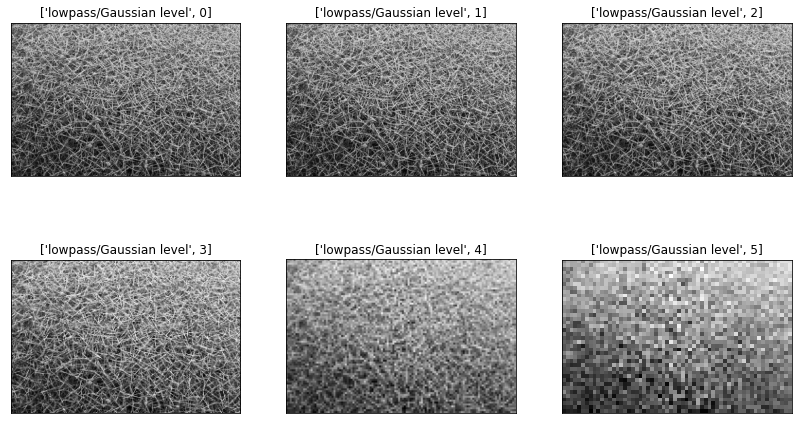

In [9]:
# plotting Gaussian levels
kk=231
# -------------------------
plt.subplots(2,3,figsize=(14,8))
for i in range(levels):
    plt.subplot(kk),plt.imshow(np.uint8( imgl[i]) , cmap = 'gray')
    plt.title(['lowpass/Gaussian level',i]), plt.xticks([]), plt.yticks([])
    kk += 1

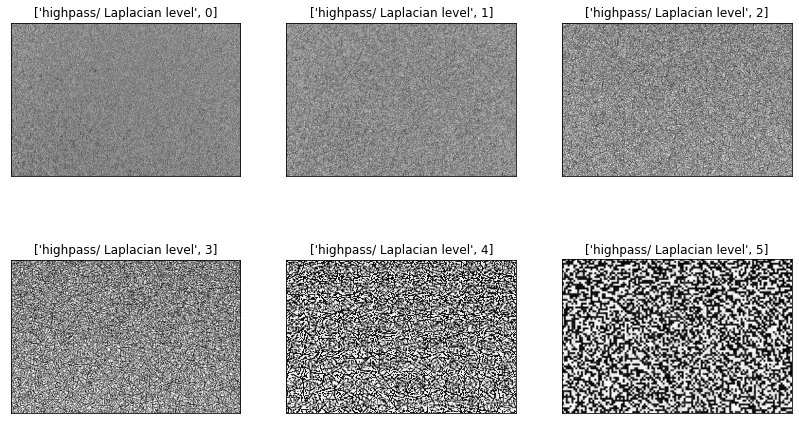

In [10]:
# plotting Laplacian levels
kk=231
# -------------------------
plt.subplots(2,3,figsize=(14,8))
for i in range(levels):
    plt.subplot(kk),plt.imshow(np.uint8( imgh[i]) , cmap = 'gray')
    plt.title(['highpass/ Laplacian level',i]), plt.xticks([]), plt.yticks([])
    kk += 1

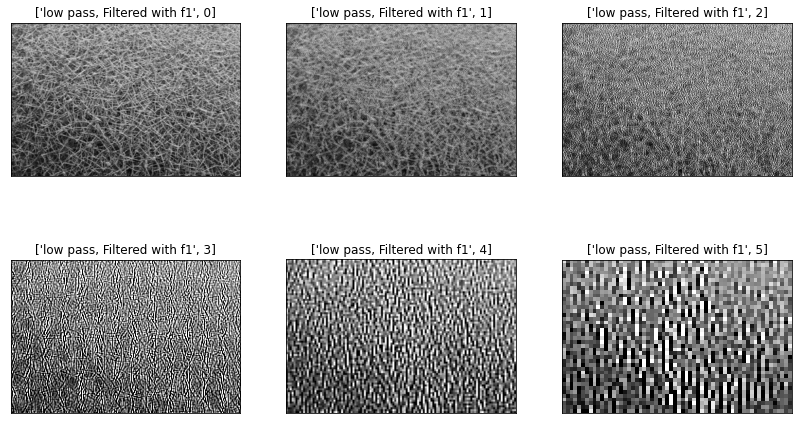

In [12]:
# plotting filtered levels, f1
#
kk=231
# -------------------------
plt.subplots(2,3,figsize=(14,8))
for i in range(levels):
    plt.subplot(kk),plt.imshow(np.uint8( fl1[i]) , cmap = 'gray')
    plt.title(['low pass, Filtered with f1',i]), plt.xticks([]), plt.yticks([])
    kk += 1

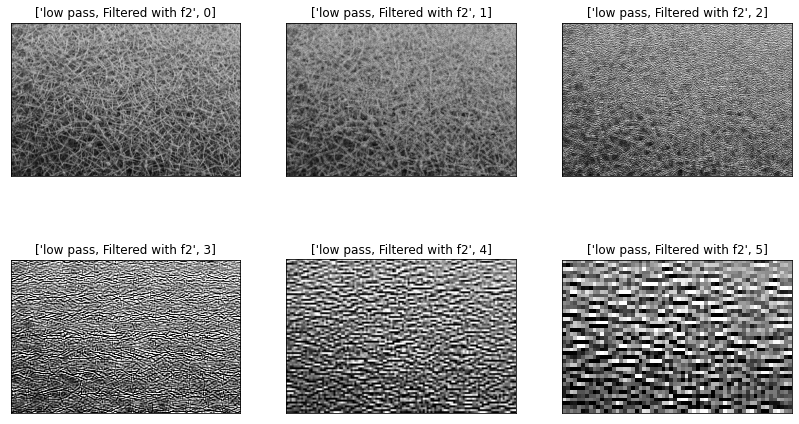

In [14]:
# plotting filtered levels, f2
#
kk=231
# -------------------------
plt.subplots(2,3,figsize=(14,8))
for i in range(levels):
    plt.subplot(kk),plt.imshow(np.uint8( fl2[i]) , cmap = 'gray')
    plt.title(['low pass, Filtered with f2',i]), plt.xticks([]), plt.yticks([])
    kk += 1

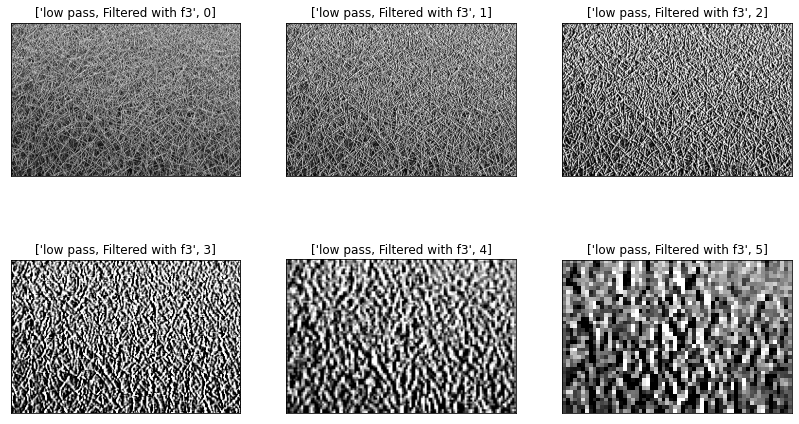

In [15]:
# plotting filtered levels, f3
#
kk=231
# -------------------------
plt.subplots(2,3,figsize=(14,8))
for i in range(levels):
    plt.subplot(kk),plt.imshow(np.uint8( fl3[i]) , cmap = 'gray')
    plt.title(['low pass, Filtered with f3',i]), plt.xticks([]), plt.yticks([])
    kk += 1

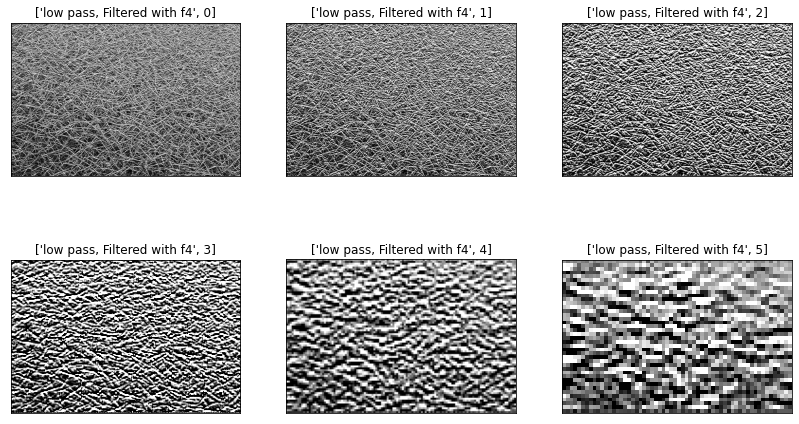

In [16]:
# plotting filtered levels, f4
#
kk=231
# -------------------------
plt.subplots(2,3,figsize=(14,8))
for i in range(levels):
    plt.subplot(kk),plt.imshow(np.uint8( fl4[i]) , cmap = 'gray')
    plt.title(['low pass, Filtered with f4',i]), plt.xticks([]), plt.yticks([])
    kk += 1